### 단순 선형회귀 Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 아버지와 아들의 키 - Galton

In [2]:
# df = pd.read_csv('https://www.randomservices.org/random/data/Galton.txt', sep='\t')
# df = pd.read_csv('http://tiny.cc/mosaic/galton.csv', sep='\t')
# df.head()

In [3]:
df = pd.read_csv('data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌
- 칼럼명을 Father, Son 으로 변경
- 단위(inch --> cm) 변경

In [4]:
# Filtering
df = df[df.Gender == 'M']
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4


In [5]:
# Selection
# 아빠키,아들키
df = df[['Father', 'Height']]
# 컬럼명 변경
df.columns = ['Father', 'Son']
df.head(3)

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [6]:
# 단위 변경
df = df * 2.54
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


- 산점도 구하기

In [ ]:
# Father 독립변수 X축
# Son 종속변수 Y축

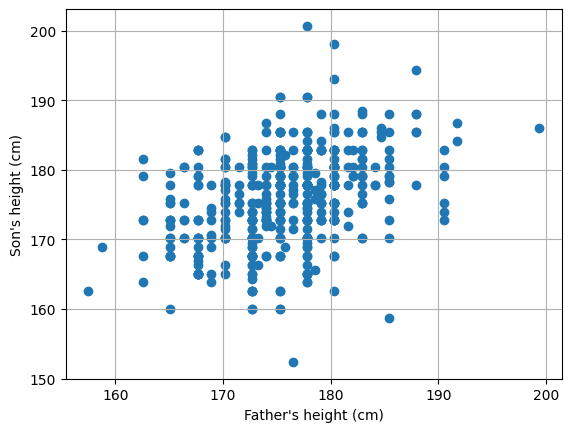

(None, None)

In [11]:
# plt.figure(figsize=(5,5))
plt.scatter(df.Father, df.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
# plt.title('Father vs. Son', fontsize=15)
plt.grid(), plt.show()

- 회귀선 구하고 그리기
    - np.linalg.lstsq() # 최소 자승법(Least square)
    - np.polyfit()

In [15]:
weight, bias = np.polyfit(df.Father, df.Son, 1)     # X, Y degree(차수)
weight, bias

(0.4477479176030284, 97.17763700739303)

In [16]:
# 2차식의 회귀식
np.polyfit(df.Father, df.Son, 2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [17]:
df.Father.max(), df.Father.min()

(199.39000000000001, 157.48)

In [18]:
# 회귀선(직선)
xs = np.array([157, 200])
ys = xs * weight + bias 
ys

array([167.47406007, 186.72722053])

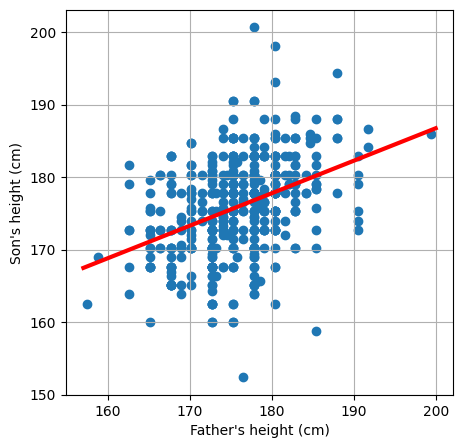

(None, None)

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, c='red',lw=3)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
# plt.title('Father vs. Son', fontsize=15)
plt.grid(), plt.show()

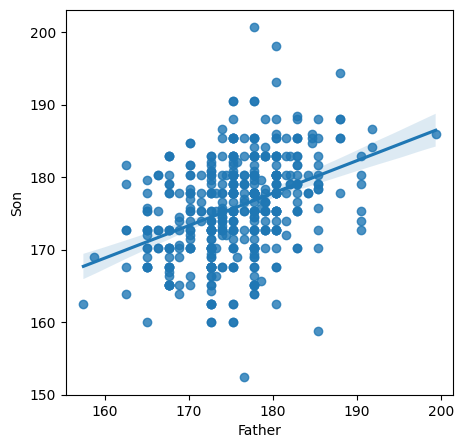

In [23]:
plt.figure(figsize=(5,5))
sns.regplot(x='Father', y='Son', data=df)
plt.show()

- Scikit-learn 으로 회귀식 구하기

In [24]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [29]:
# X 데이터의 차원을 2로 만들어주어야 함
X = df.Father.values.reshape(-1,1) 
y = df.Son.values
X.shape, y.shape

((465, 1), (465,))

In [30]:
# 2차원으로 바꾸려면
# (465,1) 이게 맞음..
# (1,465)

In [31]:
# 학습
lr.fit(X, y)

LinearRegression()

In [ ]:
회귀선을 얻으려면
intercept_ 로 bias,편향 을 확인하고
.coef_ 회귀계수 확인하고
y = 1.0
y = intercept_값 + .coef_ * x

In [ ]:
# coef_ : 선형 회귀 모델의 기울기(slope)
# ntercept_ : 선형 회귀 모델의 절편(intercept)
# 선형 회귀 모델은 y = ax + b 의 식을 기반으로 합니다. 
# 여기서 a는 기울기, b는 절편입니다. 
# 기울기는 x값이 1증가할 때 y값이 얼마나 증가하는지를 나타내며, 
# 절편은 y값이 0일 때의 x값을 나타냅니다.

# 예를 들어, lr.coef_ 가 [1, 2] 이고 lr.intercept_ 가 3이면 
# 선형 회귀 모델은 y = x1 + 2x2 + 3 의 식을 따릅니다. 
# 즉, x1이 1증가할 때 y값은 1증가하고, 
# x2가 1증가할 때 y값은 2증가합니다. 
# 또한 x1과 x2가 모두 0일 때 y값은 3입니다.

In [32]:
# weight, bias 
# 학습을 마치면 우리한테 주는것
lr.coef_, lr.intercept_
# np.polyfit()으로 구한 값: (0.4477479176030284, 97.17763700739303)
# lr.coef_, lr.intercept_ == np.polyfit(df.Father, df.Son, 1)

(array([0.44774792]), 97.17763700739333)

- 잔차 제곱의 합(RSS: Residual Sum of Square) 제공하던거 사라짐 사용못함..

- 평가 - R Squared

In [33]:
lr.score(X,y)   # 1 - Sum of Square Error(잔차residue) / Sum of Square Total

0.15312927478307026

In [34]:
from sklearn.metrics import r2_score 
pred = lr.predict(X)
r2_score(y, pred) # 0~1사이의 값 선형 모델이 (회귀식이 0.8정도로 갔다면 잘한것)

0.15312927478307026

In [35]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y, pred) # 이숫자 하나로 얻을수 있는 정보가 없다.. 두개가 어떤게 좋으냐고 판단할수있게 주어야함

37.756127990309636